In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

In [6]:
import cactas as C


2023-01-31 19:49:04.048592: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
asymp = np.load('/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/asymp_cropped_no_norm.npy')
symp = np.load('/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/symp_cropped_no_norm.npy')

In [4]:
labels = np.array([0]*len(asymp) + [1]*len(symp))
images = np.concatenate((asymp, symp))

In [5]:
train_f1 = []
test_f1 = []
for i in range(10):
    X, y = shuffle(images, labels, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=0)
    rf = RandomForestClassifier(n_estimators=100)
    
    X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])

    fitted = rf.fit(X_train_raveled, y_train)
    
    y_pred = rf.predict(X_val_raveled)
    
    
    f1 = sklearn.metrics.f1_score(y_val, y_pred)
    train_f1.append(f1)
    print('run', i, 'acc', sklearn.metrics.accuracy_score(y_val, y_pred), 'f1', f1)
    
    asymp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/asymp_cropped.npy')
    symp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/symp_cropped.npy')

    labels_test = np.array([0]*len(asymp_test) + [1]*len(symp_test))
    images_test = np.concatenate((asymp_test, symp_test))
    
    X_test, y_test = shuffle(images_test, labels_test, random_state=0)
    
    X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
    
    y_pred = rf.predict(X_test_raveled)
    
    test_acc = sklearn.metrics.accuracy_score(y_test, y_pred)
    c_test_f1 = sklearn.metrics.f1_score(y_test, y_pred)
    print('test run', i, 'acc', test_acc, 'f1', c_test_f1)
    
    test_f1.append(c_test_f1)

run 0 acc 0.875 f1 0.8807339449541284
test run 0 acc 0.5163636363636364 f1 0.5266903914590748
run 1 acc 0.875 f1 0.8828828828828829
test run 1 acc 0.5036363636363637 f1 0.5039370078740157
run 2 acc 0.875 f1 0.8785046728971964
test run 2 acc 0.5 f1 0.49664429530201337
run 3 acc 0.875 f1 0.8828828828828829
test run 3 acc 0.5060606060606061 f1 0.4990780577750461
run 4 acc 0.8846153846153846 f1 0.8888888888888888
test run 4 acc 0.5187878787878788 f1 0.5362149532710281
run 5 acc 0.8942307692307693 f1 0.8990825688073394
test run 5 acc 0.4993939393939394 f1 0.5
run 6 acc 0.875 f1 0.8785046728971964
test run 6 acc 0.5242424242424243 f1 0.5151327980234712
run 7 acc 0.8557692307692307 f1 0.8648648648648649
test run 7 acc 0.5121212121212121 f1 0.5194029850746269
run 8 acc 0.8942307692307693 f1 0.897196261682243
test run 8 acc 0.5072727272727273 f1 0.508761329305136
run 9 acc 0.9038461538461539 f1 0.9074074074074074
test run 9 acc 0.516969696969697 f1 0.5230400957510473


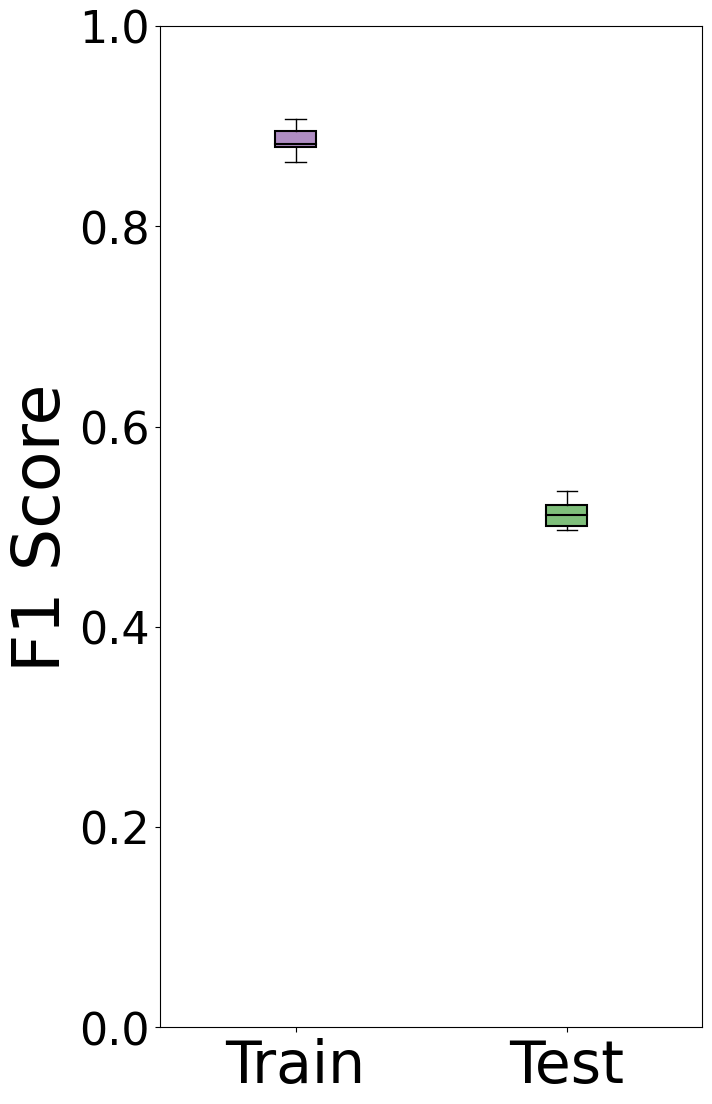

Train 0.8860949048165029 +/- 0.011701540718467001
Test 0.5128901913835459 +/- 0.012661060655960519
t_20 = 64.942 ,p= 0.0


In [10]:
data = [train_f1, test_f1]
labels = ['Train', 'Test']
C.Util.boxplot(data, labels, y_lim=1, y_label='F1 Score', outputdir='/raid/mpsych/CACTAS/')

In [5]:
X, y = shuffle(images, labels, random_state=0)

In [6]:
len(images)

1034

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=0)

In [59]:
rf = RandomForestClassifier(n_estimators=100)

In [60]:
X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])

fitted = rf.fit(X_train_raveled, y_train)

In [61]:
y_pred = rf.predict(X_val_raveled)

In [62]:
sklearn.metrics.accuracy_score(y_val, y_pred)

0.8846153846153846

In [63]:
sklearn.metrics.f1_score(y_val, y_pred)

0.8867924528301887

In [64]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [65]:
y_val

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [97]:
asymp_test.shape

(876, 64, 64, 1)

In [98]:
symp_test.shape

(774, 64, 64, 1)

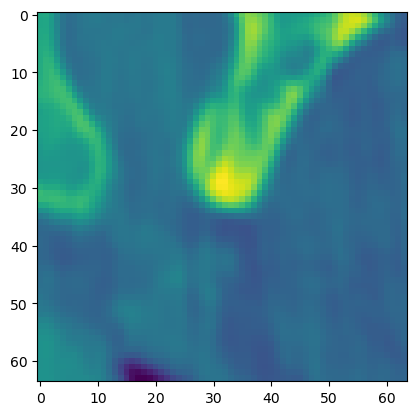

In [99]:
imshow(symp_test[0])

In [85]:
asymp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/asymp_cropped.npy')
symp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/symp_cropped.npy')

In [86]:
labels_test = np.array([0]*len(asymp_test) + [1]*len(symp_test))
images_test = np.concatenate((asymp_test, symp_test))

In [87]:
X_test, y_test = shuffle(images_test, labels_test, random_state=0)

In [88]:
X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [89]:
y_pred = rf.predict(X_test_raveled)

In [90]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.5163636363636364

In [91]:
sklearn.metrics.f1_score(y_test, y_pred)

0.5067985166872683

In [92]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [93]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [94]:
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.5171409861597819

In [95]:
sklearn.metrics.recall_score(y_test, y_pred)

0.5297157622739018

In [96]:
sklearn.metrics.precision_score(y_test, y_pred)

0.48578199052132703